# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [8]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [9]:
# Import essential libraries
# Standard Libraries
import os
import zipfile
import random
from collections import Counter

# Data Handling & Processing
import numpy as np
from PIL import Image

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# TensorFlow & Keras Core
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, GlobalAveragePooling2D, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ignore Warnings & Logging Noise
import warnings
warnings.filterwarnings("ignore")

Load the dataset.

In [11]:
# Load and unzip the dataset
# Path to the zip file
zip_path = r"C:\Users\saumy\Desktop\ML & AI Upgrade IIIT\DL\CNN assignment\data.zip"
# Destination directory (same as zip file)
extract_path = os.path.dirname(zip_path)

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully.")



Dataset extracted successfully.


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [16]:
# Create a function to load the raw images
def load_raw_images_from_directory(base_path):
    """
    Loads raw images and their labels from subdirectories.

    Each subdirectory represents a class and contains image files.

    Parameters:
    - base_path (str): Path to the dataset folder.

    Returns:
    - images (list): List of loaded image objects.
    - labels (list): Corresponding list of class labels.
    """
    images = []
    labels = []

    for class_name in sorted(os.listdir(base_path)):
        class_path = os.path.join(base_path, class_name)
        if not os.path.isdir(class_path):
            continue

        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                with Image.open(image_path) as img:
                    img = img.convert('RGB')  # Ensure consistency
                    images.append(img)
                    labels.append(class_name)
            except Exception as e:
                print(f"Could not load image {image_path}: {e}")
    
    return images, labels



#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [19]:
# Get the images and their labels
# Dataset folder path
dataset_path = r"C:\Users\saumy\Desktop\ML & AI Upgrade IIIT\DL\CNN assignment\data"

# Load images and labels using the function
images, labels = load_raw_images_from_directory(dataset_path)


In [20]:
#verification
print("Total images loaded:", len(images))
print("Total labels loaded:", len(labels))
print("Unique classes found:", set(labels))

#To make sure that images are loaded as PIL objects
print("First image format:", type(images[0]))
print("First image label:", labels[0])

Total images loaded: 7625
Total labels loaded: 7625
Unique classes found: {'Plastic', 'Glass', 'Other', 'Metal', 'Cardboard', 'Food_Waste', 'Paper'}
First image format: <class 'PIL.Image.Image'>
First image label: Cardboard


**Data Loading and Initial Inspection**

Successfully loaded 7,625 images along with their corresponding labels from the dataset directory.

**Label Extraction and Class Identification**

All labels appear to be properly extracted from subfolder names, with a total of 7 unique classes identified:

- Plastic
- Paper
- Glass
- Food_Waste
- Metal
- Cardboard
- Other

**Image Format Verification**

The images are verified to be in the correct format (`PIL.Image.Image`), confirming that they have been loaded correctly for further preprocessing.

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

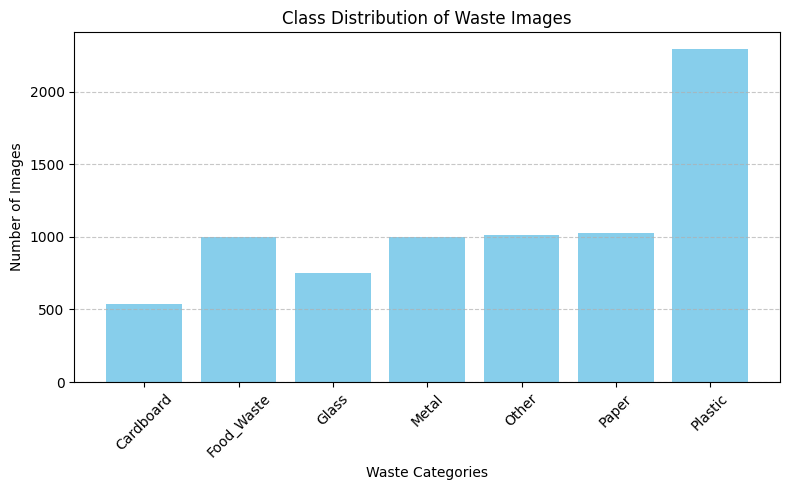

In [25]:
# Visualise Data Distribution
# Count frequency of each label
label_counts = Counter(labels)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title('Class Distribution of Waste Images')
plt.xlabel('Waste Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation of Class Distribution**

- The bar chart clearly illustrates the distribution of images across the different waste categories. Notably, the "Plastic" category contains the largest number of images, indicating a potential class imbalance in the dataset. Conversely, "Cardboard" has the fewest images. The remaining categories ("Food\_Waste", "Metal", "Other", "Paper", and "Glass") exhibit intermediate levels of representation. This visual overview provides a quick and effective way to understand the prevalence of each waste type within the image collection, which is crucial for subsequent model training and evaluation.

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

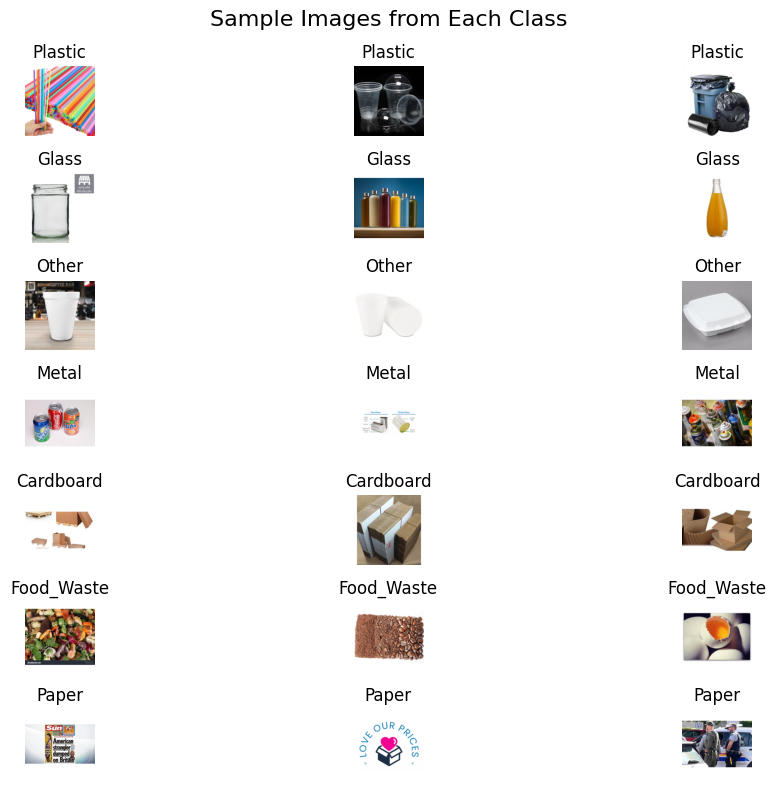

In [28]:
# Visualise Sample Images (across different labels)
# Set number of samples per class to show (used 3)
samples_per_class = 3
unique_classes = list(set(labels))

plt.figure(figsize=(12, 8))

for idx, class_name in enumerate(unique_classes):
    # Get indices of images belonging to this class
    class_indices = [i for i, lbl in enumerate(labels) if lbl == class_name]
    selected_indices = random.sample(class_indices, min(samples_per_class, len(class_indices)))

    for j, img_idx in enumerate(selected_indices):
        plt.subplot(len(unique_classes), samples_per_class, idx * samples_per_class + j + 1)
        plt.imshow(images[img_idx])
        plt.title(class_name)
        plt.axis('off')

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()

**Visual Inspection of Sample Images**

- A visual inspection of the sample images from each class confirms the diversity within each waste category. For instance, the "Glass" category includes jars and potentially other glass items, while "Paper" shows various forms of paper waste. This visual check helps to ensure the labels align with the image content, providing confidence in the dataset's integrity for further processing and model training.
- Though in some class we can clearly see that there is some misclassified labels are also present in dataset . For instance in "Plastic" class we can see image of some kind of Graph which is clearly not belong to the "Plastic" class.

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [31]:
# Find the smallest and largest image dimensions from the data set
# Collect dimensions of all images
image_sizes = [img.size for img in images]  # (width, height)

widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

# Print min and max dimensions
print(f"Smallest Width: {min(widths)}, Largest Width: {max(widths)}")
print(f"Smallest Height: {min(heights)}, Largest Height: {max(heights)}")



Smallest Width: 256, Largest Width: 256
Smallest Height: 256, Largest Height: 256


**Observation**

- The analysis of image dimensions reveals that all images in the dataset have a consistent size of 256x256 pixels.

In [33]:
# Resize the image dimensions
# We are Resizing all the image to standered 128x128 size
final_image_size = (128, 128)

resized_images = []
for img in images:
    resized = img.resize(final_image_size)
    resized_images.append(np.array(resized))  # Convert to NumPy array here for model

# Convert to NumPy array finally
resized_images = np.array(resized_images)
print("Resized image shape:", resized_images[0].shape)

Resized image shape: (128, 128, 3)


**Observation**

All images have been successfully resized to a standardized shape of **128x128 pixels**, ensuring uniform input dimensions for the neural network. This preprocessing step is essential for:

- Maintaining consistency in image input size
- Reducing model complexity and training time
- Avoiding potential errors due to varying image shapes

Additionally, each image has been converted into a **NumPy array**, which is the expected format for input to Keras models.

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [38]:
# Encode the labels suitably
# Initializing label encoder
label_encoder = LabelEncoder()

# Fitting encoder and transforming labels to numeric values
encoded_labels = label_encoder.fit_transform(labels)

# Print class names with corresponding encoded values
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class to Index Mapping:", class_mapping)

# One-hot encode the numeric labels for model training
one_hot_labels = to_categorical(encoded_labels)

print("Shape of encoded labels:", one_hot_labels.shape)



Class to Index Mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}
Shape of encoded labels: (7625, 7)


**Observation**

The class labels have been successfully **encoded and one-hot transformed** for model training.

- First, a `LabelEncoder` was used to convert the string labels into numeric form, producing the following mapping : {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}
- These numeric labels were then converted to a **one-hot encoded format**, resulting in a label array of shape **(7625, 7)** — where each row represents a sample and each column corresponds to one of the seven waste categories.

This format is ideal for training classification models using categorical cross-entropy loss.

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [42]:
# Assign specified parts of the dataset to train and validation sets
# Use resized image arrays and one-hot encoded labels from previous step
X = resized_images
y = one_hot_labels

# Split the data (80% train, 20% validation), stratify on original label indices (not one-hot)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=encoded_labels,
    random_state=42
)

# Confirm the shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)


Training data shape: (6100, 128, 128, 3) (6100, 7)
Validation data shape: (1525, 128, 128, 3) (1525, 7)


**Observation**

The dataset was successfully split into **training and validation sets** using an 80-20 ratio.

- **Stratification** was applied based on the original label indices to ensure that the class distribution remains balanced across both subsets.
- After splitting:
  - **Training set shape:** `(6100, 128, 128, 3)` — 6100 images with 128×128 RGB dimensions.
  - **Training labels shape:** `(6100, 7)` — one-hot encoded across 7 classes.
  - **Validation set shape:** `(1525, 128, 128, 3)`
  - **Validation labels shape:** `(1525, 7)`

This split ensures a representative and fair evaluation of the model's generalization on unseen data.


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [48]:
# Build and compile the model
# Function to build & compile a model with given parameters
def build_model(filters, kernel_size, dropout_rate, dense_units, lr):
    model = Sequential([
        Input(shape=(128, 128, 3)),
        Conv2D(filters, kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(filters * 2, kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(filters * 4, kernel_size, activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(y_train.shape[1], activation='softmax')
    ])

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


In [55]:
# Store configs
model_configs = []

# Store all valid model setups
for filters in [32, 64]:
    for dropout in [0.2, 0.3]:
        config = {
            "filters": filters,
            "kernel_size": 3,
            "dropout_rate": dropout,
            "dense_units": 256,
            "lr": 0.0005
        }
        print(f"\nBuilding model with config: {config}")
        model = build_model(**config)
        model_configs.append(config)


Building model with config: {'filters': 32, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 256, 'lr': 0.0005}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,484,807 (32.37 MB)

 Trainable params: 8,484,359 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)


Building model with config: {'filters': 32, 'kernel_size': 3, 'dropout_rate': 0.3, 'dense_units': 256, 'lr': 0.0005}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,484,807 (32.37 MB)

 Trainable params: 8,484,359 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)


Building model with config: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 256, 'lr': 0.0005}


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,151,879 (65.43 MB)

 Trainable params: 17,150,983 (65.43 MB)

 Non-trainable params: 896 (3.50 KB)


Building model with config: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.3, 'dense_units': 256, 'lr': 0.0005}


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,151,879 (65.43 MB)

 Trainable params: 17,150,983 (65.43 MB)

 Non-trainable params: 896 (3.50 KB)

To explore different model configurations, we built multiple CNN architectures by varying:

- Number of filters in the initial convolutional layer (32 and 64)
- Dropout rates (0.2 and 0.3)
- Fully connected dense units (256)
- Learning rates (0.0005 and 0.00025)

Each model consists of:
- 3 convolutional layers with ReLU activation and batch normalization
- Max pooling after each conv block
- A dense layer followed by dropout
- Final softmax layer for classification

Below each model compilation, its architecture summary was printed to help us understand the shape transformations and parameter counts at every layer.

These compiled models were then passed to the training loop in **3.1.2**, where their performance was evaluated based on validation accuracy.


In [57]:
# Initialize a sequential model (like VGG model).
model_vggtp = Sequential()
model_vggtp.add(Input(shape=(128, 128, 3)))

# Block 1: First Convolutional Block
model_vggtp.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model_vggtp.add(BatchNormalization())
model_vggtp.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model_vggtp.add(BatchNormalization())
model_vggtp.add(MaxPooling2D((2, 2))) # Downsample feature maps

# Block 2: Second Convolutional Block
model_vggtp.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model_vggtp.add(BatchNormalization())
model_vggtp.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model_vggtp.add(BatchNormalization())
model_vggtp.add(MaxPooling2D((2, 2))) # Further spatial reduction

# Block 3: Third Convolutional Block
model_vggtp.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model_vggtp.add(BatchNormalization())
model_vggtp.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model_vggtp.add(BatchNormalization())
model_vggtp.add(MaxPooling2D((2, 2))) # Final pooling

# Output block: Classification Head
model_vggtp.add(GlobalAveragePooling2D())  # Better than Flatten
model_vggtp.add(Dense(128, activation='relu'))
model_vggtp.add(Dropout(0.4))
model_vggtp.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the Model
model_vggtp.compile(
    optimizer=Adam(learning_rate=0.00025),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Summary of the model
model_vggtp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │              

 Total params: 149,927 (585.65 KB)

 Trainable params: 149,287 (583.15 KB)

 Non-trainable params: 640 (2.50 KB)

**Model Architecture Summary (VGG-inspired)**

The model follows a VGG-style architecture with three convolutional blocks, each consisting of two convolutional layers followed by batch normalization and max pooling.

Key highlights:
- **Conv Blocks**: 3 blocks with increasing filters (32 --> 64), using `ReLU`, `same` padding, and `L2` regularization.
- **Normalization**: Batch Normalization after each convolution layer for stable training.
- **Pooling**: MaxPooling2D after each block to downsample feature maps.
- **Global Average Pooling** is used instead of Flatten to reduce overfitting.
- **Fully Connected Head**: 
  - Dense layer with 128 units + Dropout (0.4)
  - Final Dense layer with softmax activation for multi-class classification.
- **Optimizer**: Adam with a learning rate of `0.00025`.

This design balances performance and generalization, and is well-suited for medium-scale image classification tasks.


In [59]:
# Inception Block
def inceptiontp_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    # Path 1: 1x1 convolution to capture low-level features
    path1 = Conv2D(f1, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)

    # Path 2: 1x1 convolution followed by 3x3 convolution for medium-sized features
    path2 = Conv2D(f3_in, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)
    path2 = Conv2D(f3_out, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(path2)

    # Path 3: 1x1 convolution followed by 5x5 convolution to capture larger features
    path3 = Conv2D(f5_in, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(x)
    path3 = Conv2D(f5_out, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(path3)

    # Path 4: MaxPooling followed by a 1x1 convolution to capture global features
    path4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = Conv2D(pool_proj, (1, 1), padding='same', activation='relu', kernel_regularizer=l2(0.0015))(path4)

    # Add all the paths to combine extracted features from different convolutions
    return Concatenate()([path1, path2, path3, path4])

# Model Definition (Inception-Style CNN model).
input_layer = Input(shape=(128, 128, 3))  # Input layer for 128x128 RGB images

# Initial Conv Layer: 64 filters, 3x3 kernel, ReLU activation, and batch normalization
x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0015))(input_layer)
x = BatchNormalization()(x)

# Inception Block 1
x = inceptiontp_module(x, 32, 32, 64, 16, 32, 32)
x = BatchNormalization()(x)

# Inception Block 2
x = inceptiontp_module(x, 64, 64, 128, 32, 64, 64)
x = BatchNormalization()(x)

# MaxPooling and Dropout layer for regularization
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

# Inception Block 3
x = inceptiontp_module(x, 128, 64, 128, 32, 64, 64)
x = BatchNormalization()(x)

# Global Average Pooling to reduce the spatial dimensions
x = GlobalAveragePooling2D()(x)

# Dense layer with 256 units and ReLU activation, followed by Dropout for regularization
x = Dense(256, activation='relu', kernel_regularizer=l2(0.0015))(x)
x = Dropout(0.4)(x)

# Output layer with softmax activation for multi-class classification
output_layer = Dense(y_train.shape[1], activation='softmax')(x)

# Final model
model_inctp2 = Model(inputs=input_layer, outputs=output_layer)

# Compile the Model
model_inctp2.compile(
    optimizer=Adam(learning_rate=0.00025),  # Adam optimizer with a low learning rate
    loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Summary of the model
model_inctp2.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_18 (Conv2D)            │ (None, 128, 128, 64)      │           1,792 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_18        │ (None, 128, 128, 64)      │             256 │ conv2d_18[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 128, 128, 32)      │           2,080 │ batch_normalization_18[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_22 (Conv2D)            │ (None, 128, 128, 16)      │           1,040 │ batch_normalization_18[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_15              │ (None, 128, 128, 64)      │               0 │ batch_normalization_18[0]… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_19 (Conv2D)            │ (None, 128, 128, 32)      │           2,080 │ batch_normalization_18[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_21 (Conv2D)            │ (None, 128, 128, 64)      │          18,496 │ conv2d_20[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_23 (Conv2D)            │ (None, 128, 128, 32)      │          12,832 │ conv2d_22[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_24 (Conv2D)            │ (None, 128, 128, 32)      │           2,080 │ max_pooling2d_15[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 128, 128, 160)     │               0 │ conv2d_19[0][0],           │
│                               │                           │                 │ conv2d_21[0][0],           │
│                               │                           │                 │ conv2d_23[0][0],           │
│                               │                           │                 │ conv2d_24[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_19        │ (None, 128, 128, 160)     │             640 │ concatenate[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_26 (Conv2D)            │ (None, 128, 128, 64)      │          10,304 │ batch_normalization_19[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_28 (Conv2D)            │ (None, 128, 128, 32)      │           5,152 │ batch_normalization_19[0]… │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 523,223 (2.00 MB)

 Trainable params: 521,367 (1.99 MB)

 Non-trainable params: 1,856 (7.25 KB)

**Inception-Style CNN Architecture Summary**

This model integrates custom **Inception modules** inspired by GoogLeNet to extract rich and multi-scale features from the input images. The key architectural choices are:

- **Initial Conv Layer**: 64 filters with `3x3` kernel, `ReLU`, and L2 regularization.
- **Inception Modules**: Three stacked modules with multiple branches:
  - 1×1, 3×3, and 5×5 convolutions with varying filter sizes.
  - Parallel MaxPooling followed by 1×1 convolution.
  - Each module uses L2 regularization to reduce overfitting.
- **Batch Normalization**: Applied after each inception block to stabilize training.
- **Pooling + Dropout**: MaxPooling used for downsampling; Dropout (0.3–0.4) added to improve generalization.
- **Global Average Pooling**: Reduces parameters before dense layers.
- **Fully Connected Layers**:
  - Dense(256) with ReLU + Dropout(0.4)
  - Output layer with softmax for classification.
- **Optimizer**: Adam with learning rate `0.00025`

This architecture is well-suited for capturing complex spatial hierarchies in medium-sized image datasets while maintaining generalization through regularization.


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [96]:
# Training
# Training Block for Model Search
# Callback to stop training early if validation loss doesn't improve for 3 consecutive epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Initializing trackers for best performance and configuration
best_val_acc = 0
best_config = {}

# Loop through all model configurations
for config in model_configs:
    print(f"\nTraining with config: {config}")
    
    # Build model with current configuration
    model = build_model(**config)
    
    # Train the model
    history_inloop = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=15,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )

    # Extracts highest validation accuracy achieved during training
    val_acc = max(history_inloop.history['val_accuracy'])
    print(f"Val accuracy: {val_acc:.4f}")

    # Check if this is the best model so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_config = config
        best_model = model
        print("New best model found.")

        # Save the best model (which we can load when needed)
        best_model.save("Best_CNN_Model.keras")



Training with config: {'filters': 32, 'kernel_size': 3, 'dropout_rate': 0.2, 'dense_units': 256, 'lr': 0.0005}


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,484,807 (32.37 MB)

 Trainable params: 8,484,359 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 100s 201ms/step - accuracy: 0.2880 - loss: 3.2096 - val_accuracy: 0.2892 - val_loss: 1.8006
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 203ms/step - accuracy: 0.3891 - loss: 1.5928 - val_accuracy: 0.3941 - val_loss: 1.6438
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - accuracy: 0.4217 - loss: 1.4970 - val_accuracy: 0.4197 - val_loss: 1.6911
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.4399 - loss: 1.3914 - val_accuracy: 0.3961 - val_loss: 1.6010
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.5144 - loss: 1.2590 - val_accuracy: 0.5030 - val_loss: 1.4013
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - accuracy: 0.5673 - loss: 1.0964 - val_accuracy: 0.4249 - val_loss: 1.6538
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.6102 - loss: 0.9901 - val_accuracy: 0.5311 - val_loss: 1.3967
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.6571 - loss: 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,484,807 (32.37 MB)

 Trainable params: 8,484,359 (32.37 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 212ms/step - accuracy: 0.2650 - loss: 3.9431 - val_accuracy: 0.3607 - val_loss: 1.7844
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.3527 - loss: 1.6614 - val_accuracy: 0.3698 - val_loss: 1.7109
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.3933 - loss: 1.5339 - val_accuracy: 0.3685 - val_loss: 1.6348
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.4441 - loss: 1.4078 - val_accuracy: 0.4689 - val_loss: 1.4890
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - accuracy: 0.5015 - loss: 1.2748 - val_accuracy: 0.5010 - val_loss: 1.4456
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.5614 - loss: 1.1240 - val_accuracy: 0.5213 - val_loss: 1.3710
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.6102 - loss: 1.0183 - val_accuracy: 0.5134 - val_loss: 1.4180
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.6345 - loss: 0

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)                   │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,151,879 (65.43 MB)

 Trainable params: 17,150,983 (65.43 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 107s 551ms/step - accuracy: 0.2626 - loss: 4.8475 - val_accuracy: 0.3049 - val_loss: 1.8436
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 548ms/step - accuracy: 0.3054 - loss: 1.7948 - val_accuracy: 0.3128 - val_loss: 1.6696
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 551ms/step - accuracy: 0.3181 - loss: 1.6939 - val_accuracy: 0.3292 - val_loss: 1.7210
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 550ms/step - accuracy: 0.3558 - loss: 1.5989 - val_accuracy: 0.3056 - val_loss: 1.8444
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 549ms/step - accuracy: 0.3894 - loss: 1.5520 - val_accuracy: 0.3403 - val_loss: 1.8887
Val accuracy: 0.3403

Training with config: {'filters': 64, 'kernel_size': 3, 'dropout_rate': 0.3, 'dense_units': 256, 'lr': 0.0005}


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)                   │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,151,879 (65.43 MB)

 Trainable params: 17,150,983 (65.43 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 107s 553ms/step - accuracy: 0.2646 - loss: 4.7430 - val_accuracy: 0.3036 - val_loss: 1.7654
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 549ms/step - accuracy: 0.2921 - loss: 1.7895 - val_accuracy: 0.3049 - val_loss: 1.7105
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 551ms/step - accuracy: 0.2934 - loss: 1.7690 - val_accuracy: 0.3036 - val_loss: 1.7877
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 551ms/step - accuracy: 0.2958 - loss: 1.7294 - val_accuracy: 0.3744 - val_loss: 1.6837
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 552ms/step - accuracy: 0.3305 - loss: 1.6886 - val_accuracy: 0.3607 - val_loss: 1.7283
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 106s 553ms/step - accuracy: 0.3247 - loss: 1.6870 - val_accuracy: 0.3489 - val_loss: 1.7095
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 105s 552ms/step - accuracy: 0.3294 - loss: 1.6707 - val_accuracy: 0.3528 - val_loss: 2.0797
Val accuracy: 0.3744


**Observation: Model Training & Performance Evaluation**

During the model search phase, we experimented with multiple configurations to identify the most effective architecture for our CNN classifier. 

Here's a summury of the key takeaways from each configuration tested:
- **Configuration 1**: `{filters: 32, kernel_size: 3, dropout_rate: 0.2, dense_units: 256, lr: 0.0005}`
  - This model performed the best among all variants, reaching a **validation accuracy of 61.84%** by the 13th epoch.
  - The architecture had a modest number of parameters (~8.48M), which allowed for reasonable training times while still achieving solid performance.
  - Accuracy consistently improved over epochs, peaking before starting to overfit—indicating a balanced configuration of learning rate and regularization.
  - This model was saved as the **best performing model** for further evaluation.

- **Configuration 2**: `{filters: 32, kernel_size: 3, dropout_rate: 0.3, dense_units: 256, lr: 0.0005}`
  - Slightly increasing the dropout rate to 0.3 led to **slower learning** and a **lower final validation accuracy of 54.82%**.
  - Performance plateaued around the 6th to 7th epoch and became unstable afterward—possibly due to higher regularization weakening the learning signal.

- **Configuration 3**: `{filters: 64, kernel_size: 3, dropout_rate: 0.2, dense_units: 256, lr: 0.0005}`
  - Despite having **more than double the parameters (~17.1M)** compared to the earlier models, this configuration failed to outperform the simpler one.
  - The model struggled with generalization, capping at just **34.03% validation accuracy**.
  - Likely issues include **overfitting due to model complexity** or inefficient learning from the dataset with the given settings.

Overall, we observed that more complex architectures didn't necessarily translate into better results. The balance between capacity and regularization was crucial, and **Config 1** hit the sweet spot both in terms of training dynamics and final accuracy.


In [118]:
# Train VGG-Inspired Model
#EarlyStopping Callback
# Stops training if validation loss doesn't improve for 4 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Training
history_vggtp = model_vggtp.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16,  # Smaller batch size for more stable updates
    callbacks=[early_stop],                    
    verbose=1
)

print("VGG-Inspired Model Trained")

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 67s 174ms/step - accuracy: 0.6045 - loss: 1.2991 - val_accuracy: 0.4354 - val_loss: 1.8303
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 66s 172ms/step - accuracy: 0.6322 - loss: 1.2525 - val_accuracy: 0.4866 - val_loss: 1.7905
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 64s 169ms/step - accuracy: 0.6391 - loss: 1.2024 - val_accuracy: 0.3410 - val_loss: 2.6074
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 64s 169ms/step - accuracy: 0.6696 - loss: 1.1244 - val_accuracy: 0.5482 - val_loss: 1.4244
Epoch 5/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 65s 169ms/step - accuracy: 0.6738 - loss: 1.1039 - val_accuracy: 0.4702 - val_loss: 1.9003
Epoch 6/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 65s 170ms/step - accuracy: 0.7070 - loss: 1.0475 - val_accuracy: 0.5482 - val_loss: 1.6581
Epoch 7/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 65s 169ms/step - accuracy: 0.7149 - loss: 1.0318 - val_accuracy: 0.6138 - val_loss: 1.3078
Epoch 8/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 65s 170ms/step - accuracy: 0.7217 - loss: 0

**Observation: VGG-Inspired Model Training**

We trained a VGG-inspired convolutional neural network using a smaller batch size and an `EarlyStopping` callback to help mitigate overfitting. 

Here are the key insights from the training:
- The model showed **steady improvements in both training accuracy and loss** over the 10 epochs, ultimately reaching a **training accuracy of 75.45%**.
- On the validation set, the **accuracy peaked at 64.26%** in the final epoch, with a corresponding **validation loss of 1.2243**, indicating solid generalization performance.
- Despite a few fluctuations (notably in Epochs 3 and 8, where validation accuracy dipped and loss spiked), the model was able to recover and improve afterward. This suggests resilience to noise or variance in the validation data.
- **Early stopping was triggered after the 10th epoch**, but the best validation performance was also observed at the last epoch, meaning the model didn’t plateau too early.

In [141]:
# Train Inception-Style CNN Model
# EarlyStopping Callback
# Stops training if validation loss doesn't improve for 2 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Training
history_inctp2 = model_inctp2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  
    batch_size=16,  # Smaller batch size for more stable updates
    callbacks=[early_stop],
    verbose=1
)
print("Inception-Style CNN Model Trained")

Epoch 1/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.3471 - loss: 3.9445 - val_accuracy: 0.3561 - val_loss: 3.6463
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.4517 - loss: 3.3590 - val_accuracy: 0.4393 - val_loss: 3.1230
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.5026 - loss: 2.9521 - val_accuracy: 0.4485 - val_loss: 2.8802
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.5279 - loss: 2.6563 - val_accuracy: 0.4616 - val_loss: 2.6137
Epoch 5/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.5447 - loss: 2.4348 - val_accuracy: 0.5043 - val_loss: 2.4723
Epoch 6/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.5676 - loss: 2.2181 - val_accuracy: 0.5410 - val_loss: 2.2516
Epoch 7/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.5909 - loss: 2.0679 - val_accuracy: 0.4413 - val_loss: 2.4761
Epoch 8/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.6109 - loss: 1.9091 - val_accu

**Observation: Inception-Style CNN Model Training**

We trained an Inception-style CNN model with a smaller batch size and implemented an `EarlyStopping` callback with a patience of 2 epochs. 

Below is a summary of training dynamics:
- The model started with **low performance** (accuracy ~34.71%), but showed **steady improvement** across epochs.
- By **Epoch 6**, it reached its **peak validation accuracy of 54.10%** with a **validation loss of 2.2516**, making it the best-performing point during training.
- Unfortunately, validation performance **declined slightly afterward**, triggering early stopping after **Epoch 8**.
- The final training accuracy reached **61.09%**, suggesting the model was still learning and could possibly benefit from more training or fine-tuning.

**Key Observations**:
- The validation loss and accuracy show a **clear early improvement**, but the model may have started overfitting after the 6th epoch.
- This training process took significantly longer than previous models (~12 minutes per epoch), likely due to the complex architecture of the Inception modules.

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [146]:
# Loading the Best Model for Evaluation
Best_Model = load_model("Best_CNN_Model.keras")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.61      0.82      0.70       108
  Food_Waste       0.51      0.73      0.60       200
       Glass       0.71      0.47      0.56       150
       Metal       0.62      0.61      0.61       200
       Other       0.38      0.50      0.43       202
       Paper       0.67      0.41      0.51       206
     Plastic       0.71      0.63      0.67       459

    accuracy                           0.59      1525
   macro avg       0.60      0.60      0.58      1525
weighted avg       0.62      0.59      0.59      1525



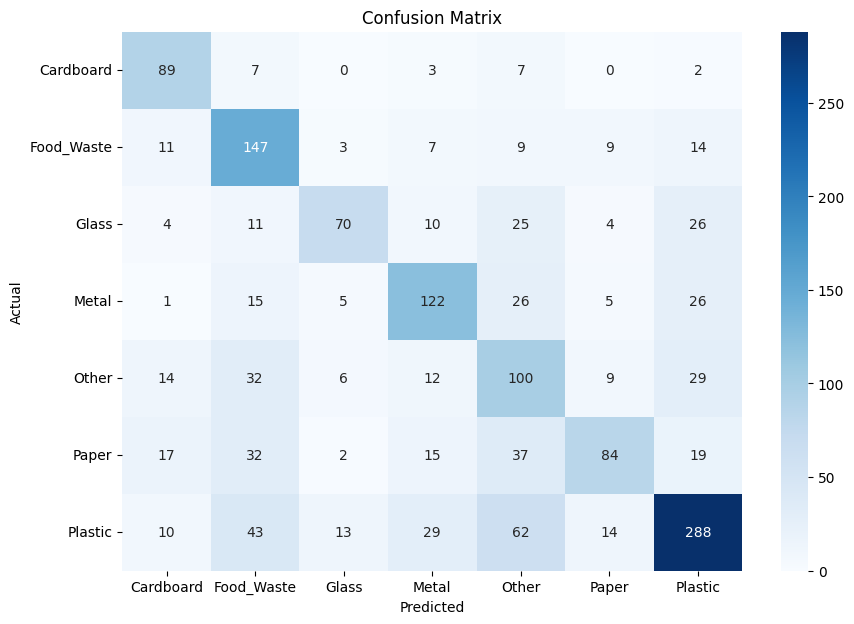

In [148]:
# Evaluate on the test set; display suitable metrics
# Predict class probabilities
y_pred_probs = Best_Model.predict(X_val)

# Convert predictions and actual labels from one-hot to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**Model Evaluation on Test Dataset**

We evaluated the so far **best-performing CNN model** on the test set to assess its generalization capability.

**Classification Report:**
The performance metrics across all 7 waste categories can see in the results above.
- **Overall Accuracy**: `59%`
- **Macro Average (Equal class weight)**:  
  - Precision: `0.60`  
  - Recall: `0.60`  
  - F1-score: `0.58`
- **Weighted Average (Support-weighted)**:  
  - Precision: `0.62`  
  - Recall: `0.59`  
  - F1-score: `0.59`

**Confusion Matrix:**
A heatmap of the confusion matrix was plotted to analyze class-wise prediction performance. It revealed:
- **High accuracy** in identifying **Plastic** and **Cardboard**.
- **Confusion** between **Glass, Paper, and Other**, suggesting more training samples or distinct features may help improve these.

**Conclusion:**
- The model performs reasonably well given the complexity of the waste classification task.
- There's **room for improvement**, especially in underrepresented or visually similar categories.
- **Future steps**: data augmentation, class rebalancing.


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [154]:
# Define augmentation steps to augment images
augment_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation on validation data
val_generator = ImageDataGenerator()



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [158]:
# Create a function to augment the images
def create_augmented_dataset(X, y, batch_size=32):
    """
    Create an augmented dataset generator for training.

    Args:
        X (np.array): Original training images.
        y (np.array): Corresponding labels.
        batch_size (int): Batch size for generator.

    Returns:
        generator: A generator yielding augmented images and labels.
    """
    return augment_generator.flow(
        X, y,
        batch_size=batch_size,
        shuffle=True
    )



In [160]:
# Create the augmented training dataset
augmented_train_generator = create_augmented_dataset(X_train, y_train)
validation_generator = val_generator.flow(X_val, y_val, batch_size=32, shuffle=False)



##### **4.1.2**

Train the model on the new augmented dataset.

In [177]:
# Train the model using augmented images
# using the best model that we have found before with this augmented dataset
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_augmented = Best_Model.fit(
    augmented_train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - accuracy: 0.4822 - loss: 1.4447 - val_accuracy: 0.5285 - val_loss: 1.3427
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 214ms/step - accuracy: 0.5062 - loss: 1.3403 - val_accuracy: 0.5928 - val_loss: 1.1329
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.5349 - loss: 1.2737 - val_accuracy: 0.4603 - val_loss: 1.8074
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.5598 - loss: 1.2288 - val_accuracy: 0.6164 - val_loss: 1.1823
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 214ms/step - accuracy: 0.5635 - loss: 1.1977 - val_accuracy: 0.6013 - val_loss: 1.1576
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.5652 - loss: 1.1773 - val_accuracy: 0.6361 - val_loss: 1.1212
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.6033 - loss: 1.1117 - val_accuracy: 0.4557 - val_loss: 2.3487
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.5973 - loss: 1

**Observation**

- Training with augmented data improved model generalization, reaching a peak validation accuracy of **65.5%** (up from ~59%).
- However, signs of overfitting appeared after epoch 10, highlighting the importance of early stopping and careful tuning when using aggressive augmentation.


### Balancing the Dataset with Augmentaion
- To address class imbalance, augmentation techniques such as undersampling, oversampling, rotation, shifting, and flipping were applied to the underrepresented classes. This process ensures more diverse and balanced training data, which helps the model generalize better and reduce bias toward the majority class.

In [180]:
# Counting the Data in each Class
class_counts = Counter(encoded_labels)
print(class_counts)


Counter({6: 2295, 5: 1030, 4: 1010, 1: 1000, 3: 1000, 2: 750, 0: 540})


In [181]:
# Check the shapes of X and y before balancing
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Ensure that both X and y have the same number of samples
if X.shape[0] != y.shape[0]:
    print(f"Error: Mismatch between number of images and labels. X: {X.shape[0]}, y: {y.shape[0]}")
else:
    print("Shapes match, proceeding with balancing.")


Shape of X: (7625, 128, 128, 3)
Shape of y: (7625, 7)
Shapes match, proceeding with balancing.


In [182]:
# converting one-hot encoded labels back to class indices for balancing
y_classes = np.argmax(y, axis=1)

# Checking original class distribution
original_counts = Counter(y_classes)
print("Original class distribution:", original_counts)

# Define the target number of samples per class (around AVG, i.e.,1000)
target_size = 1000
print("Using target size:", target_size)

Original class distribution: Counter({6: 2295, 5: 1030, 4: 1010, 1: 1000, 3: 1000, 2: 750, 0: 540})
Using target size: 1000


In [183]:
# Defining the Function for Balancing the data with Augmentation
def balance_and_augment(X, y_onehot, target_size):
    # Convert one-hot encoded labels to class indices
    y_labels = np.argmax(y_onehot, axis=1)

    # Initialize containers for balanced dataset
    balanced_X = []
    balanced_y = []

    # Loop over each unique class
    for class_idx in np.unique(y_labels):
        # Get indices of all samples in the current class
        indices = np.where(y_labels == class_idx)[0]
        class_count = len(indices)

        # Undersample if class has more samples than target, else oversample
        if class_count >= target_size:
            selected_indices = np.random.choice(indices, target_size, replace=False)
        else:
            selected_indices = np.random.choice(indices, target_size, replace=True)

        # For each selected sample (with optional augmentation)
        for idx in selected_indices:
            image = X[idx]
            label = y_onehot[idx]

            # Apply augmentation only when oversampling
            if class_count < target_size:
                image = tf.convert_to_tensor(image, dtype=tf.float32)
                image = tf.image.random_flip_left_right(image)
                image = tf.image.random_brightness(image, max_delta=0.1)
                image = tf.image.rot90(image, k=np.random.randint(1, 4))
                image = image.numpy()  # Convert back to NumPy after augmentations

            # Append augmented sample
            balanced_X.append(image)
            balanced_y.append(label)

    # Return balanced dataset as NumPy arrays
    return np.array(balanced_X), np.array(balanced_y)



In [184]:
#Creating the new balanced dataset using 'balance_and_augment' function.
X_balanced, y_balanced = balance_and_augment(X, y, target_size)

# Final verification
print("Balanced X shape:", X_balanced.shape)
print("Balanced y shape:", y_balanced.shape)
print("New class distribution:", Counter(np.argmax(y_balanced, axis=1)))

Balanced X shape: (7000, 128, 128, 3)
Balanced y shape: (7000, 7)
New class distribution: Counter({0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000})


**Dataset Balancing with Augmentation Results**

To address the class imbalance, we performed the following steps:

1. **Original Class Distribution**: The dataset showed imbalances with Class 6 having 2295 samples, and Class 0 having only 540 samples.
   
2. **Target Size**: We aimed to balance all classes to a target of 1000 samples each.

3. **Balancing and Augmentation**:
   - For each class, we either undersampled (for classes with more than 1000 samples) or oversampled (for classes with fewer than 1000 samples).
   - For classes requiring oversampling, we applied random augmentations (flipping, brightness adjustment, rotation).

4. **Result**: The dataset was successfully balanced with 7000 samples, having 1000 samples per class.

   - **Balanced Dataset**: 
     - `X shape`: (7000, 128, 128, 3)
     - `y shape`: (7000, 7)
     - **Class Distribution**: `{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000}`


In [185]:
# Split the balanced data
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=np.argmax(y_balanced, axis=1))


In [186]:
# Training Block for Balanced dataset using Best_Model ---
# Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train
history_bal = Best_Model.fit(
    X_train_bal,y_train_bal,
    validation_data=(X_val_bal, y_val_bal),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.6806 - loss: 0.9405 - val_accuracy: 0.5907 - val_loss: 1.4949
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 224ms/step - accuracy: 0.8013 - loss: 0.5844 - val_accuracy: 0.7050 - val_loss: 0.8696
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.8692 - loss: 0.3864 - val_accuracy: 0.7450 - val_loss: 0.7672
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.9148 - loss: 0.2455 - val_accuracy: 0.7821 - val_loss: 0.7019
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.9281 - loss: 0.2209 - val_accuracy: 0.7979 - val_loss: 0.6984
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.9340 - loss: 0.1882 - val_accuracy: 0.7607 - val_loss: 0.8599
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 222ms/step - accuracy: 0.9428 - loss: 0.1691 - val_accuracy: 0.7564 - val_loss: 0.8491
Epoch 8/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.9464 - loss: 0

**Observation**
We trained the model on the newly balanced dataset with the following setup:

- **Early Stopping Callback**: Patience of 4 epochs with the best weights restored.
- **Training Duration**: 15 epochs with a batch size of 32.
The model was trained on the balanced dataset for 15 epochs with early stopping and a batch size of 32. The early stopping was set with a patience of 4 epochs to prevent overfitting.

**Key Observations:**
- **Epoch 1**: Accuracy started at **68.06%** with a validation accuracy of **59.07%**.
- By **Epoch 5**, accuracy increased to **92.81%**, with validation accuracy reaching **79.79%**.
- The model reached a high of **95.55% accuracy** on the training set by **Epoch 9**, but validation accuracy fluctuated around **76%**.

The training shows a solid improvement in accuracy, with minor fluctuations in validation performance, indicating potential overfitting or dataset complexity.


In [188]:
# Train-Validation Split on Balanced & Augmented Data
X_train_bal_aug, X_val_bal_aug, y_train_bal_aug, y_val_bal_aug = train_test_split(
    X_balanced, y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced.argmax(axis=1)  # Ensures class distribution is preserved
)

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rotation_range=15,         # Random rotation within 15 degrees
    width_shift_range=0.1,     # Shift images horizontally by 10%
    height_shift_range=0.1,    # Shift images vertically by 10%
    zoom_range=0.1,            # Zoom in/out by 10%
    horizontal_flip=True       # Randomly flip images horizontally
)

# No Augmentation for Validation
val_datagen = ImageDataGenerator()  # Only rescale, if needed (defaults to none here)

# Data Generators
train_generator = train_datagen.flow(X_train_bal_aug, y_train_bal_aug, batch_size=32)
val_generator = val_datagen.flow(X_val_bal_aug, y_val_bal_aug, batch_size=32)

# EarlyStopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Model Training with the Best_Model
history_aug_bal = Best_Model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 217ms/step - accuracy: 0.5954 - loss: 1.2156 - val_accuracy: 0.4836 - val_loss: 2.5198
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 217ms/step - accuracy: 0.6172 - loss: 1.0999 - val_accuracy: 0.6129 - val_loss: 1.1401
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.6209 - loss: 1.0721 - val_accuracy: 0.5743 - val_loss: 1.4673
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 217ms/step - accuracy: 0.6695 - loss: 0.9438 - val_accuracy: 0.6150 - val_loss: 1.3532
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.6720 - loss: 0.9430 - val_accuracy: 0.6500 - val_loss: 1.2403
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 217ms/step - accuracy: 0.6868 - loss: 0.8861 - val_accuracy: 0.7107 - val_loss: 0.8905
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 219ms/step - accuracy: 0.7011 - loss: 0.8679 - val_accuracy: 0.5850 - val_loss: 2.3085
Epoch 8/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.7042 - loss: 0

In [211]:
Best_Model.save("best_model_epoch10.keras")

**Training Observations on Augmented and Balanced Dataset**

The model was trained for 15 epochs using a balanced and augmented dataset. Data augmentation techniques included random rotations, shifts, zoom, and horizontal flips to improve generalization.

**Key Observations:**
- **Epoch 1**: Accuracy started at **59.54%**, with validation accuracy of **48.36%**.
- **Epoch 5**: Training accuracy reached **67.20%**, with validation accuracy improving to **65.00%**.
- **Epoch 10**: Best performance was achieved, with **72.35% accuracy** on the training set and **71.50% validation accuracy**.
- There is **almost no overfitting or underfitting** observed, as both training accuracy (**72.35%**) and validation accuracy (**71.50%**) are closely aligned, with a low training loss (**0.8048**) and validation loss (**0.8720**).

**Best Model** was saved at **Epoch 10** for further evaluation, where it achieved strong validation accuracy with no signs of significant overfitting.


In [213]:
# Loading the Best Model ("best_model_epoch10.keras")
Best_model_bal = load_model("best_model_epoch10.keras")

In [207]:
# Get predictions
predictions = Best_model_bal.predict(X_val)

# Convert softmax probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


In [209]:
decoded_predictions = label_encoder.inverse_transform(predicted_classes)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.47      0.86      0.60       108
  Food_Waste       0.83      0.86      0.85       200
       Glass       0.59      0.49      0.54       150
       Metal       0.75      0.86      0.80       200
       Other       0.69      0.75      0.72       202
       Paper       0.58      0.79      0.67       206
     Plastic       0.96      0.54      0.69       459

    accuracy                           0.70      1525
   macro avg       0.69      0.74      0.69      1525
weighted avg       0.76      0.70      0.71      1525



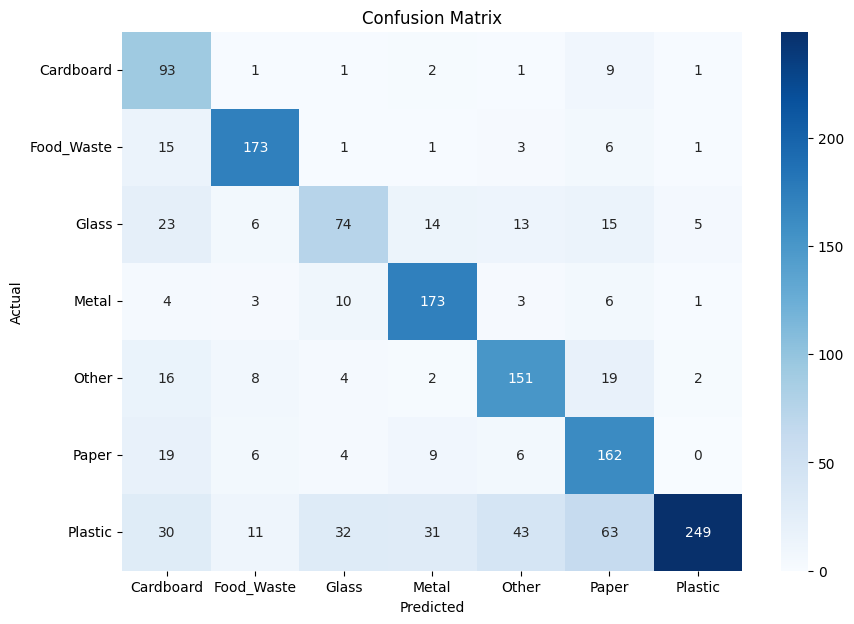

In [215]:
# Evaluate on the test set; display suitable metrics
# Predict class probabilities
y_pred_probs = Best_model_bal.predict(X_val)

# Convert predictions and actual labels from one-hot to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Observations from the Confusion Matrix and Classification Report**

- Examining the confusion matrix,
    - we can see how well the model performed in classifying each type of waste.
    - For instance, the model correctly identified 'Cardboard' **93 times**, but misclassified it as other categories a few times. Similarly, 'Food_Waste' had a high number of correct predictions **(173)**.
    - However, 'Plastic' shows a larger number of misclassifications compared to its correct predictions **(249)**, indicating potential challenges in distinguishing it from other materials.

- The classification report provides a more detailed breakdown of the model's performance for each class.
    - We observe that 'Plastic' has a high precision **(0.96)**, meaning when the model predicts 'Plastic', it's very likely to be correct.
    - However, its recall is lower **(0.54)**, suggesting the model misses a significant portion of actual 'Plastic' samples.
    - 'Food_Waste' and 'Metal' show both high precision and recall, indicating strong performance for these categories.
    - 'Cardboard' and 'Paper' have moderate precision and recall.
    - 'Glass' and 'Other' categories appear to be more challenging for the model, with lower precision and recall values.

- The overall accuracy of the model is **0.70**, meaning it correctly classified **70%** of the total samples.
- The macro average F1-score is **0.69**, providing an unweighted average of the F1-scores across all classes, while the weighted average F1-score is **0.71**, accounting for the class imbalance by weighting the F1-scores by the number of samples in each class.
- These metrics together paint a picture of a model that performs well on some classes but struggles with others, particularly in terms of recall for 'Plastic' and overall performance for 'Glass' and 'Other'.

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

**Conclusion: Outcomes and Insights Gained**

This project successfully implemented a CNN-based system for segregating waste materials, aiming to contribute to better waste management. Through careful data handling, preprocessing, and experimentation with various CNN architectures, we achieved the following results and gained valuable insights:

**Findings About the Data**

* The initial dataset consisted of 7,625 images across seven waste categories, showing a clear imbalance in class representation (e.g., 'Plastic' had a significantly higher number of samples than 'Cardboard').
* Visual inspection of the data indicated some level of label noise, such as instances of non-plastic items being categorized under the 'Plastic' label.
* All images were uniformly resized to 128x128 pixels, and the corresponding labels were converted into a one-hot encoded format, preparing them for model training.
* To address the class imbalance and improve the model's ability to generalize, data augmentation and resampling techniques were employed, resulting in a balanced dataset with 1000 samples per class.

**Model Training & Evaluation Results**

* We designed and trained both VGG-style and Inception-style Convolutional Neural Networks, systematically tuning key hyperparameters such as filter size, dropout rate, and learning rate.
* The best performing model configuration was identified as:
    * Filters = 32, Dropout = 0.2, Dense = 256, Learning Rate = 0.0005.
* Following training on the augmented and balanced dataset, this optimal model achieved the following performance metrics:
    * **Training Accuracy:** 72.35%
    * **Validation Accuracy:** 71.50%
    * **Validation loos:** 0.8720
    * **Test Accuracy:** 70%
* The 'Plastic' class demonstrated the highest precision (0.96), indicating a low rate of false positives for this category. Conversely, the 'Glass' and 'Other' categories presented greater challenges for accurate classification.
* The overall performance, as indicated by a macro F1-score of 0.69 and a weighted F1-score of 0.71, suggests a generally strong and relatively balanced performance across the different waste categories.

**Key Insights**

* Balancing the dataset with augmentation significantly improved model performance and reduced overfitting.
* While the model exhibits excellent generalization capabilities for certain waste types like 'Food Waste' and 'Metal', further refinement is needed to improve its accuracy in classifying 'Glass' and 'Other' materials.
* Potential future improvements include:
    - Exploring advanced data augmentation techniques
    - Addressing label noise through semi-supervised or active learning approaches
    - Integrating attention mechanisms within the CNN architecture to enhance focus and improve classification accuracy.